## Storytelling for adult incomes:

In [2]:
#import libraries:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
#import data and look at the first few rows:
df = pd.read_csv('adult_incomes.csv')

In [4]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [5]:
print(df['education'].unique())

['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']


In [6]:
print(df['marital-status'].unique())

['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


In [7]:
print(df['occupation'].unique())

['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']


In [8]:
print(df['workclass'].unique())

['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [9]:
print(df['native-country'].unique())

['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']


we have some missing data for occupation, workclass, and native-country in the form of '?'

In [10]:
df.shape

(48842, 15)

### A question to ask - does income increase with increased education - my assumption is yes, but there are probably some outliers

In [11]:
print(df['income'].unique())

['<=50K' '>50K']


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [13]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [14]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [15]:
2809/48842

0.05751197739650301

In [16]:
#probably fine to remove the '?' cells from our data set - as the overall percentage isn't that high.  under 6%

df = df[df["workclass"] != "?"]
df = df[df["occupation"] != "?"]
df = df[df["native-country"] != "?"]

df.shape

(45222, 15)

In [17]:
print(48842-45222)
print(45222/48842)
#so we remove 3620 data points from our df - df is now 93% of what it was.

3620
0.9258834609557348


<AxesSubplot:xlabel='income', ylabel='age'>

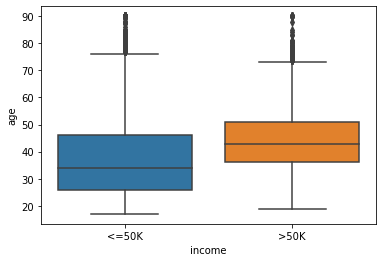

In [18]:
sns.boxplot(x='income',y='age',data=df)

In [19]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#### Remove the <=50k wording and replace it with 0 for less than or equal to 50k and 1 for greater than 50k

In [20]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [21]:
df.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,33307,14783,21055,6020,18666,38903,30527,41292


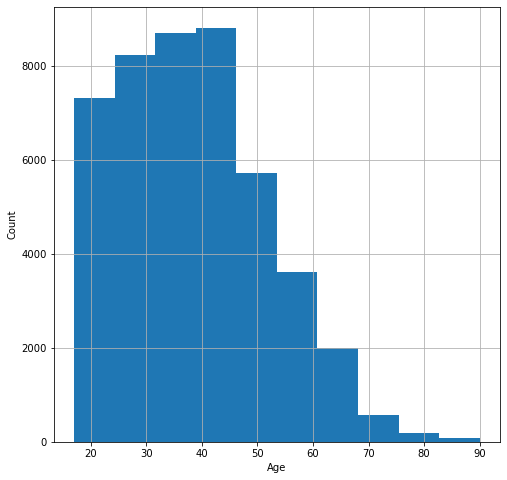

In [22]:
df['age'].hist(figsize=(8,8))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

This histogram is right skewed, but that makes sense becuase there are relatively more people in the 20-50 year range than there are in the 50-80 year range

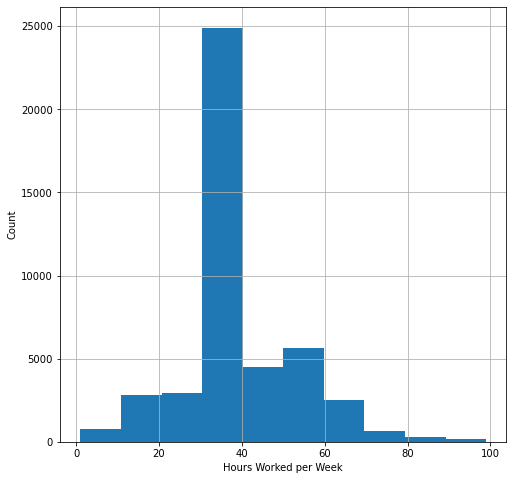

In [23]:
#lets take a look at hours worked per week - I assume a large spike in the 40hr mark
df['hours-per-week'].hist(figsize=(8,8))
plt.xlabel('Hours Worked per Week')
plt.ylabel('Count')
plt.show()

We find that there is an additional spike at the 50-60 hour mark.  Lets increase bin size to see if we can drill down to see some additional insight.

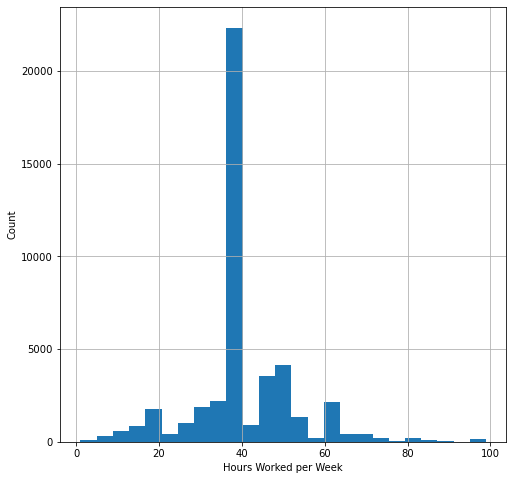

In [24]:
df['hours-per-week'].hist(bins = 25, figsize=(8,8))
plt.xlabel('Hours Worked per Week')
plt.ylabel('Count')
plt.show()

We gain some additional insight in that there is a spike in the 45-50 hour range.  This might be people exaggerating their work hours...  Also it seems like there's a number of people who are working less than 20 hours, assuming those to be part time workers.

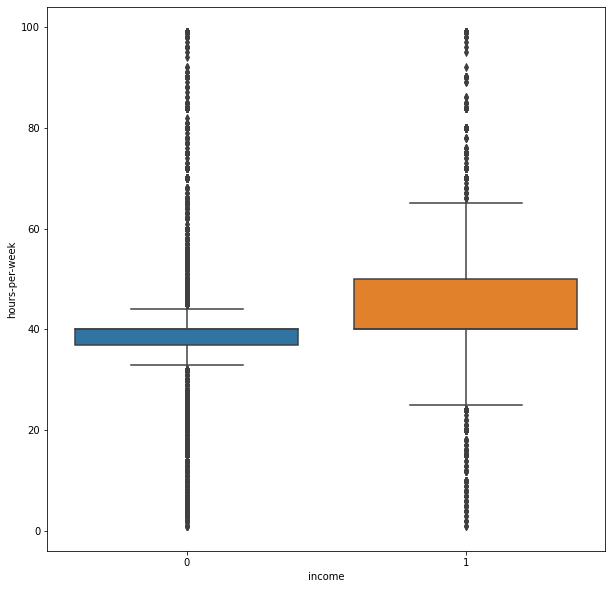

In [25]:
#let's check if the hours worked per week increases the income rate:

fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="hours-per-week", data=df)
plt.show()

It does, but there is some overlap, so this one is hard to pin down

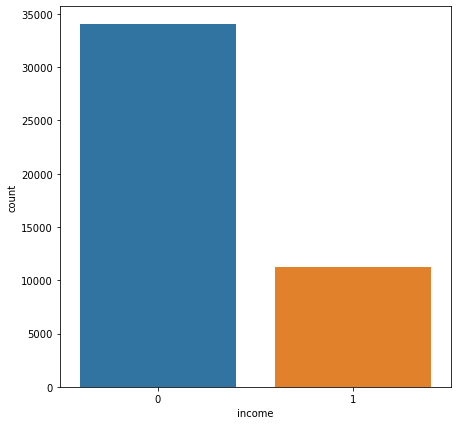

In [26]:
plt.figure(figsize=(7,7))
total = float(len(df))
ax = sns.countplot(x="income", data=df)
plt.show()

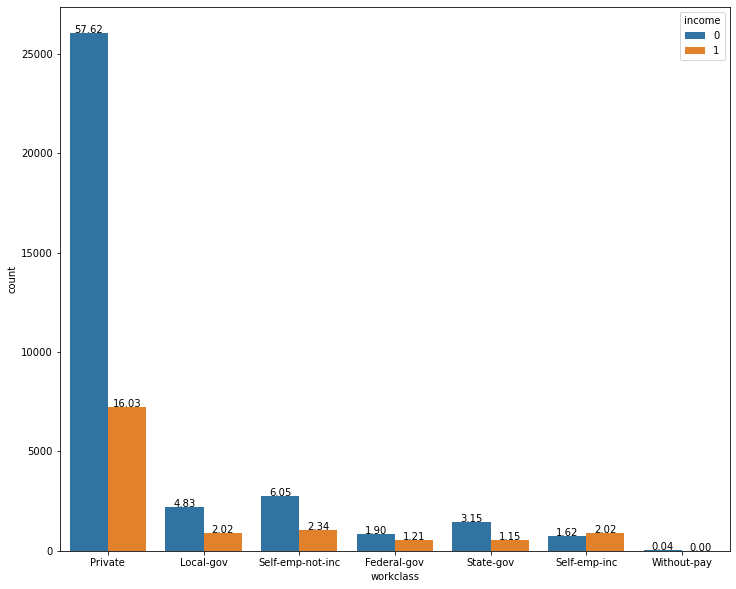

In [28]:
plt.figure(figsize=(12,10))
total = float(len(df["income"]))

ax = sns.countplot(x="workclass", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.0, height + 3, '{:1.2f}'.format((height/total)*100), ha="center") 
plt.show()

Looking at the chart above, we look at the sectors and the percentage relation between those that make under 50k and those that make over 50k.  The only field (and this makes sense now that I see it) is that self employed workers tend to make over the 50k mark.  This is lots of contract work, where, especially in tech, the rates can be upwards of 250$ an hour.  The general trend makes sense as well, lots of people that don't make over 50k and fewer make over 50k.  If you look at the average income across the US, it's usually under 50k.  The data is skewed that way as well, more examples of people making less than 50k.

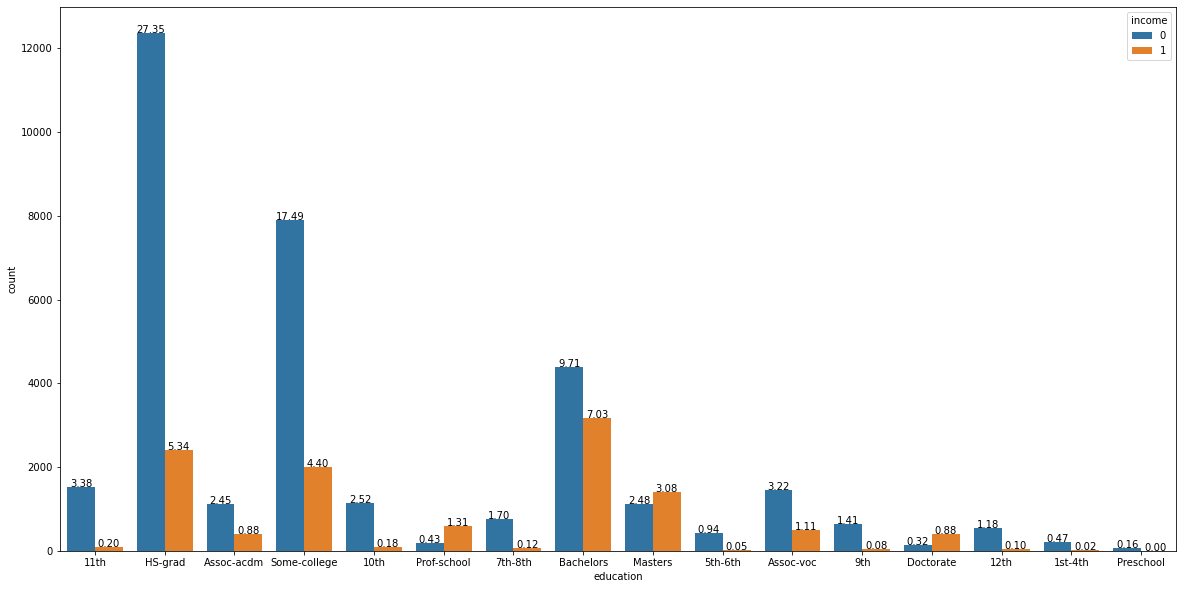

In [29]:
plt.figure(figsize=(20,10))
total = float(len(df["income"]))

ax = sns.countplot(x="education", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.0, height + 3, '{:1.2f}'.format((height/total)*100), ha="center") 
plt.show()

Taking this in a different direction.  Looking at education compared to income.  Doctorates, Masters, Prof-School all on average make over the 50k mark.  I'm surprised to see Bachelors still having a majority of people making less than 50k.  I guess thinking about it more, you have lots of majors that typically don't pay that much (teachers, social workers) - unfortunately.  

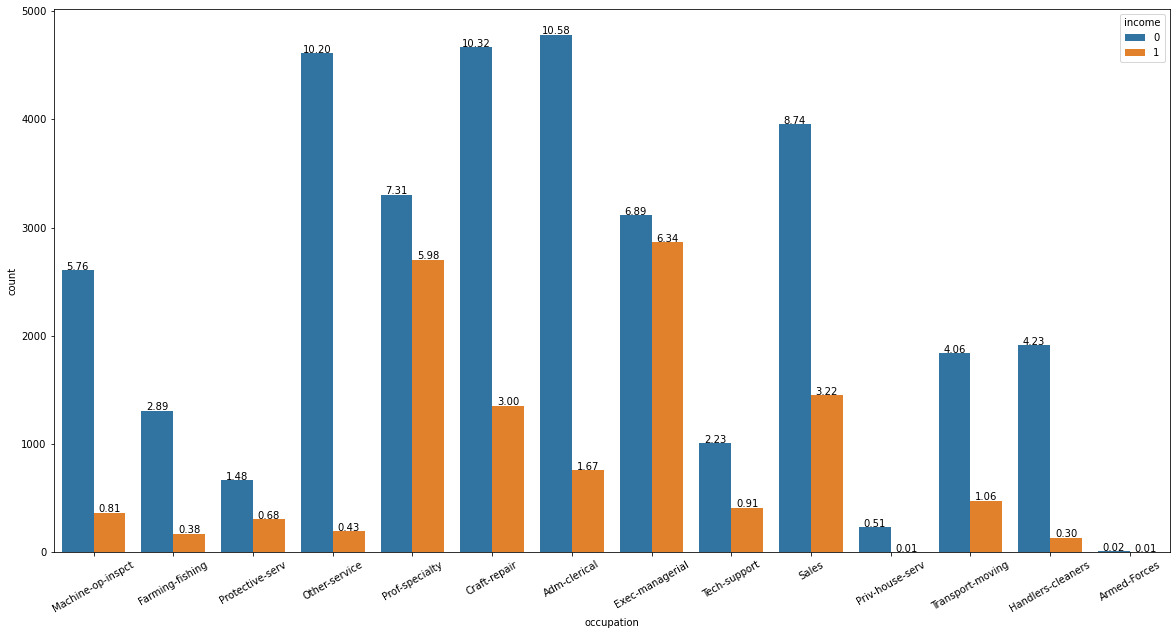

In [30]:
plt.figure(figsize=(20,10))
total = float(len(df))

ax=sns.countplot(x='occupation', hue='income', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.0, height + 3, '{:1.2f}'.format((height/total)*100), ha='center')
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

Again, we see that the distributions align with the data set as a whole.  a large mojority of the data is people making under 50k.  Intersting that the Exec-managerial has incomes lower than 50k to be the majority.  I would have anticipated that being heavily skewed in the other direction - as exec's make way more in general than 50k.